Source of data : https://archive.ics.uci.edu/ml/datasets/EMG+data+for+gestures

The data consists of raw EMG data recorded by MYO Thalmic bracelet . The bracelet consists of 8 sensors equally spaced around the forearm that simultaneously acquire mygraphic signals. The signals are wirelessly transmitted to the PC by Bluetooth . There were 36 subjects and each of them performed six basic gestures , in two series . Each gesture was performed for 3 seconds with a pause of 3 seconds interval between them.There are 8 columns which stand for the channels of Myothalmic bracelet.
The six labels given to gestures are : 0 - unmarked data, 
1 - hand at rest, 
2 - hand clenched in a fist, 
3 - wrist flexion, 
4 - wrist extension, 
5 - radial deviations, 
6 - ulnar deviations, 
7 - extended palm (the gesture was not performed by all subjects).

This analysis is for EMG data of a single person.
DAO : To be able to correctly classify the digitised gestures into the corresponding labels . 
Business metric : Model which gives a High Recall ( which is TP/ (TP + FN) Ratio of correctly classified labels to all the labels that should have been classified correctly )and with optimum time and memory usage .

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  roc_auc_score, accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_predict, cross_val_score , train_test_split, StratifiedKFold, cross_validate, KFold


In [3]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

In [5]:
## Read in the data 
data_1 = pd.read_csv("1_raw_data_13-12_22.03.16.txt" , sep = "\t")
data_2 = pd.read_csv("2_raw_data_13-13_22.03.16.txt" , sep = "\t")

In [6]:
data_1.head()

,time,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8,class
0,1,0.00001,-0.00002,-0.00001,-0.00003,0.00000,-0.00001,0.00000,-0.00001,0
1,5,0.00001,-0.00002,-0.00001,-0.00003,0.00000,-0.00001,0.00000,-0.00001,0
2,6,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001,0
3,7,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001,0
4,8,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001,0


In [7]:
data_2.head()

,time,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8,class
0,2,-0.00001,-0.00004,-0.00002,-0.00002,-0.00001,-0.00001,0.00001,-0.00003,0
1,6,-0.00001,-0.00004,-0.00002,-0.00002,-0.00001,-0.00001,0.00001,-0.00003,0
2,7,-0.00001,-0.00004,-0.00002,-0.00002,-0.00001,-0.00001,0.00001,-0.00003,0
3,8,-0.00003,-0.00005,-0.00008,-0.00004,-0.00003,0.00000,-0.00002,0.00000,0
4,9,-0.00003,-0.00001,0.00000,0.00001,-0.00001,0.00000,0.00000,-0.00002,0


In [8]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63196 entries, 0 to 63195
Data columns (total 10 columns):
time        63196 non-null int64
channel1    63196 non-null float64
channel2    63196 non-null float64
channel3    63196 non-null float64
channel4    63196 non-null float64
channel5    63196 non-null float64
channel6    63196 non-null float64
channel7    63196 non-null float64
channel8    63196 non-null float64
class       63196 non-null int64
dtypes: float64(8), int64(2)
memory usage: 4.8 MB


In [9]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57974 entries, 0 to 57973
Data columns (total 10 columns):
time        57974 non-null int64
channel1    57974 non-null float64
channel2    57974 non-null float64
channel3    57974 non-null float64
channel4    57974 non-null float64
channel5    57974 non-null float64
channel6    57974 non-null float64
channel7    57974 non-null float64
channel8    57974 non-null float64
class       57974 non-null int64
dtypes: float64(8), int64(2)
memory usage: 4.4 MB


In [10]:
data_1['class'].value_counts()

0    41272
3     3816
1     3780
6     3747
5     3615
2     3525
4     3441
Name: class, dtype: int64

65% of data is unmarked in first file -1 

In [11]:
data_2['class'].value_counts()

0    37410
1     3531
3     3513
5     3460
6     3396
4     3383
2     3281
Name: class, dtype: int64

In [12]:
37410/data_2.shape[0]

0.6452892676027184

64% of the data is unmarked in the second file .

In [13]:
data_1.isnull().sum()

time        0
channel1    0
channel2    0
channel3    0
channel4    0
channel5    0
channel6    0
channel7    0
channel8    0
class       0
dtype: int64

In [6]:
## Merge the two files. 
total_data_1 = pd.concat([data_1, data_2])

In [15]:
print(total_data_1.head())

print("\ntotal no of records in the file {}:".format(total_data_1.shape[0]))

   time  channel1  channel2  channel3  channel4  channel5  channel6  channel7  \
0     1   0.00001  -0.00002  -0.00001  -0.00003   0.00000  -0.00001   0.00000   
1     5   0.00001  -0.00002  -0.00001  -0.00003   0.00000  -0.00001   0.00000   
2     6  -0.00001   0.00001   0.00002   0.00000   0.00001  -0.00002  -0.00001   
3     7  -0.00001   0.00001   0.00002   0.00000   0.00001  -0.00002  -0.00001   
4     8  -0.00001   0.00001   0.00002   0.00000   0.00001  -0.00002  -0.00001   

   channel8  class  
0  -0.00001      0  
1  -0.00001      0  
2   0.00001      0  
3   0.00001      0  
4   0.00001      0  

total no of records in the file 121170:


EMG gesture data for a single person is 121170 records . 

In [16]:
total_data_1['class'].value_counts()

0    78682
3     7329
1     7311
6     7143
5     7075
4     6824
2     6806
Name: class, dtype: int64

In [17]:
78682/ total_data_1.shape[0]

0.6493521498720806

64% of the records have 'not marked' label . Question is why do we have such large number of unmarked records ? Do we drop these records and go ahead with classifying the rest ? We would take this call if there is no need to identify the 'unmarked' records and to save computation time and memory. 

In [7]:
## Drop the labels that are not marked .

total_data = total_data_1[total_data_1['class'] != 0]
total_data.shape

(42488, 10)

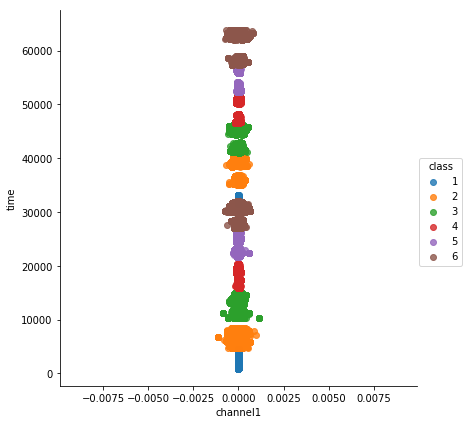

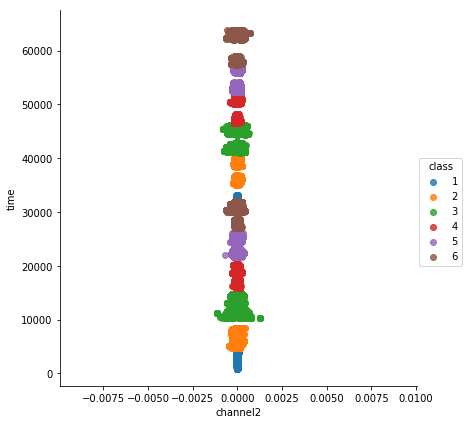

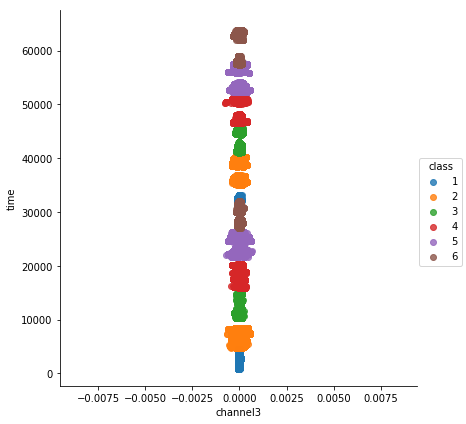

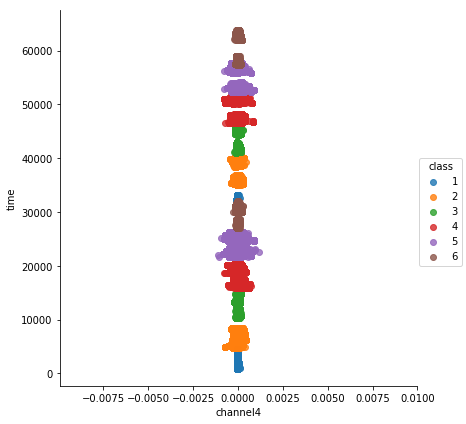

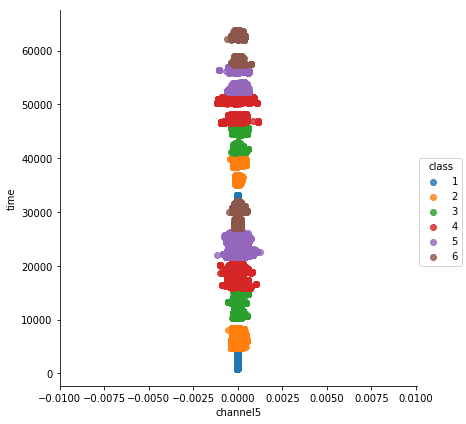

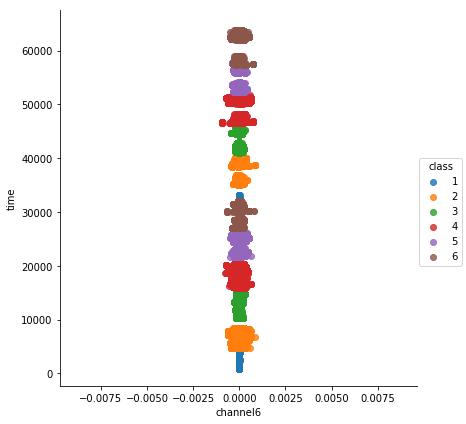

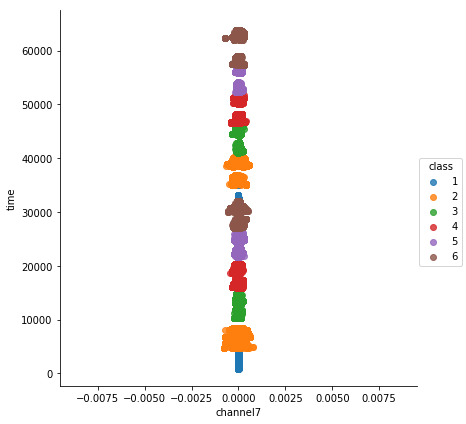

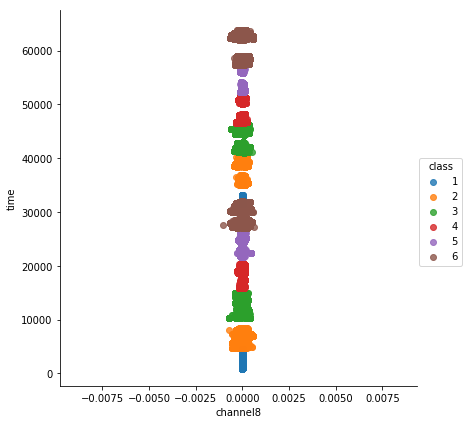

In [32]:
## Plot Channel1 data against time 
import seaborn as sns 

sns.lmplot(x= 'channel1' , y = 'time', data = total_data , hue = 'class', fit_reg = False , size = 6 )

sns.lmplot(x= 'channel2' , y = 'time', data = total_data , hue = 'class', fit_reg = False , size = 6 )

sns.lmplot(x= 'channel3' , y = 'time', data = total_data , hue = 'class', fit_reg = False , size = 6 )

sns.lmplot(x= 'channel4' , y = 'time', data = total_data , hue = 'class', fit_reg = False , size = 6 )

sns.lmplot(x= 'channel5' , y = 'time', data = total_data , hue = 'class', fit_reg = False , size = 6 )

sns.lmplot(x= 'channel6' , y = 'time', data = total_data , hue = 'class', fit_reg = False , size = 6 )

sns.lmplot(x= 'channel7' , y = 'time', data = total_data , hue = 'class', fit_reg = False , size = 6 )

sns.lmplot(x= 'channel8' , y = 'time', data = total_data , hue = 'class', fit_reg = False , size = 6 )



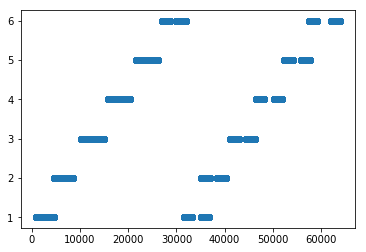

In [33]:
plt.scatter(total_data['time'], total_data['class'])

The above plots show that the activity class of 1 - 6 were performed sequentially .  Also with in each channel , the values are not the same for each class.  

In [8]:
## Use 'train_test_split' function to split data  into train and test 

target = total_data['class']
predictors = total_data.drop(['time','class'], axis = 1)

X_train,X_test,y_train,y_test = train_test_split(predictors, target, random_state = 1,test_size = 0.2,stratify = target)

print("X_train :" + str(X_train.shape))
print("X_train index nos:" + str(X_train.index))
print("X_test :" + str(X_test.shape))
print("y_train :" + str(y_train.shape))
print("y_test :" + str(y_test.shape))
   

X_train :(33990, 8)
X_train index nos:Int64Index([34002, 18341, 34582,  6648, 18862, 13638, 16719, 16247, 13219,
            14338,
            ...
             5895, 43085, 34833, 18988, 16100, 55987, 25874, 61395, 34265,
            55290],
           dtype='int64', length=33990)
X_test :(8498, 8)
y_train :(33990,)
y_test :(8498,)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CBCEADEAC8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001CBD0D32D30>]], dtype=object)

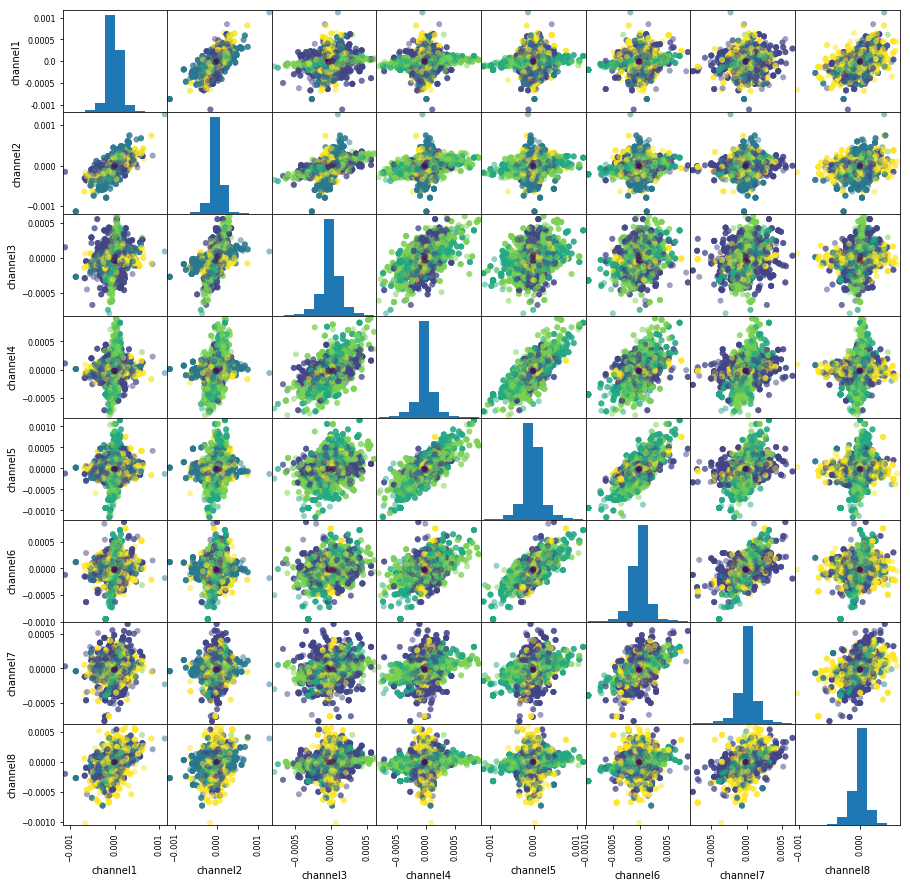

In [24]:
## Data Distribution between the different channel measurements:
pd.plotting.scatter_matrix(X_test, c= y_test , figsize = (15,15), marker = 'o')

In [35]:
## KNN Classifier 

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)

%time y_pred = knn.predict(X_test)


print("Test set score using predicted labels: {:.2f}".format(np.mean(y_pred == y_test)))

print("Calculated Test set score: {:.2f}".format(knn.score(X_test,y_test)))

print("Accuracy score :{:.3f}".format(accuracy_score(y_test,y_pred)))

print("Confusion matrix :\n{}".format(confusion_matrix(y_test,y_pred)))


Wall time: 208 ms
Test set score using predicted labels: 0.99
Calculated Test set score: 0.99
Accuracy score :0.986
Confusion matrix :
[[1462    0    0    0    0    0]
 [   2 1332    7    5    6    9]
 [   1    2 1445    1    3   14]
 [   0    2    1 1346   13    3]
 [   2    2    3   14 1391    3]
 [   1    7   13    6    3 1399]]


In [36]:
## Classification report for KNeighborClassifier 
print("Classification report :\n{}".format(classification_report(y_test,y_pred)))

Classification report :
             precision    recall  f1-score   support

          1       1.00      1.00      1.00      1462
          2       0.99      0.98      0.98      1361
          3       0.98      0.99      0.98      1466
          4       0.98      0.99      0.98      1365
          5       0.98      0.98      0.98      1415
          6       0.98      0.98      0.98      1429

avg / total       0.99      0.99      0.99      8498



Wall time: 184 ms
Wall time: 212 ms
Wall time: 230 ms
Wall time: 297 ms
Wall time: 439 ms
Wall time: 582 ms
Wall time: 988 ms


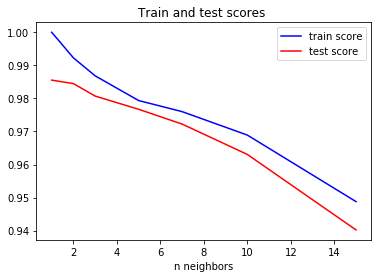

In [37]:
## Testing KNN Classifier with 'more than 1 nearest neighbors'.

k = [1,2,3,5,7,10,15]
test_score = []
train_score = []

for n in k:
    knn = KNeighborsClassifier(n_neighbors = n)
    knn.fit(X_train, y_train)
    train_score.append(knn.score(X_train,y_train))
    % time test_score.append(knn.score(X_test,y_test))
    
plt.plot(k,train_score , color = "blue" , label = "train score")
plt.plot(k, test_score , color = "red" , label = "test score")
plt.legend()
plt.title("Train and test scores ")
plt.xlabel("n neighbors")
plt.show()


Its observed that training set score is higher than test set score . The scores reduce with increase in 'nearest neighbors' . Maximum accuracy observed for 1 neighbor . 

Wall time: 6.56 s
Wall time: 7.2 s
Wall time: 7.43 s
Wall time: 7.61 s
Wall time: 7.83 s
Wall time: 7.7 s
Wall time: 7.79 s
Wall time: 8.02 s
Wall time: 8.07 s
Wall time: 8.25 s
Wall time: 8.32 s
Wall time: 8.41 s
Wall time: 8.53 s
Wall time: 8.58 s
Wall time: 9.13 s


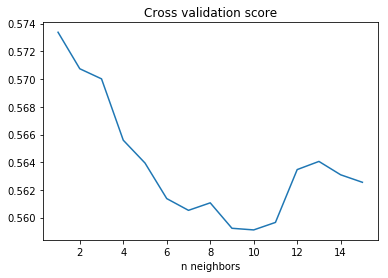

In [38]:
## Checking for accuracy with 8 fold, cross validation with 'cross_val_score' 

scores = {}
for n in range(1,16):
    knn = KNeighborsClassifier(n_neighbors = n)

    %time scores[n] = np.mean(cross_val_score(knn, predictors , target, scoring = 'accuracy', cv = 8))

plt.plot(range(1,16),scores.values())  
plt.title("Cross validation score")
plt.xlabel("n neighbors")
plt.show()



The plot above shows that while using the function 'cross_val_score', we need to specify data splitting with shuffle , which the function 'cross_val_score' does not provide. Hence we see that the test set accuracy is so low. 

Wall time: 11.7 s
Wall time: 13.9 s
Wall time: 15 s
Wall time: 16.2 s
Wall time: 15.8 s
Wall time: 16.9 s
Wall time: 18.2 s
Wall time: 18.8 s
Wall time: 20.9 s
Wall time: 21.1 s


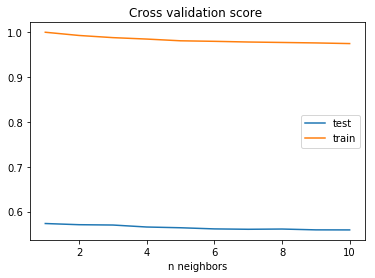

In [39]:
## Checking for accuracy with 8 fold, with 'cross_validate' function . 

test_scores = {}
train_scores = {}
for n in range(1,11):
    knn = KNeighborsClassifier(n_neighbors = n)

    %time scores = cross_validate(knn, predictors , target, scoring = 'accuracy', cv =8, return_train_score = True)
    test_scores[n] = np.mean(scores['test_score'])
    train_scores[n] = np.mean(scores['train_score'])

plt.plot(range(1,11),test_scores.values(), label = 'test')  
plt.plot(range(1,11), train_scores.values() , label = 'train')
plt.title("Cross validation score ")
plt.xlabel("n neighbors")
plt.legend()
plt.show()



The functions,cross_val_score and cross_validate split the data with out shufffling and hence the  model performs poorly on test fold. Model  is clearly overfitting . Hence we need to specify StratifiedKFold splitting with shuffle as the splitting crireria . We also notice that the time taken by 'cross_validate' is nearly twice that of 'cross_val_score' . 

Wall time: 1.34 s
Wall time: 1.42 s
Wall time: 1.56 s
Wall time: 1.83 s
Wall time: 1.79 s
Wall time: 1.9 s
Wall time: 2.04 s


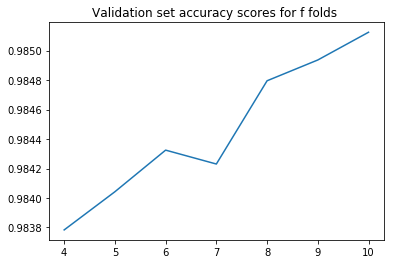


Best number of folds : 10


In [40]:
## Vary the folds from 4- 10 and checking for the accuracy with cross validation on X_train,y_train.
 
scores = {}

n_folds = list(range(4,11))
for f in n_folds:
    fold = StratifiedKFold(n_splits = f, random_state = 0 , shuffle = True)

    knn = KNeighborsClassifier(n_neighbors = 1)
    
    %time scores[f] = np.mean(cross_val_score(knn, predictors , target , scoring = 'accuracy', cv = fold))

f_best = max(scores, key = scores.get)

plt.plot(range(4,11),scores.values()) 
plt.title("Validation set accuracy scores for f folds ")
plt.show()

print("\nBest number of folds : {}" .format(f_best))

Wall time: 1.64 s
Wall time: 1.69 s
Wall time: 1.83 s
Wall time: 1.96 s
Wall time: 2.13 s
Wall time: 2.32 s
Wall time: 2.52 s
Wall time: 2.68 s
Wall time: 2.95 s
Wall time: 3.25 s
Wall time: 3.57 s
Wall time: 3.95 s
Wall time: 4.28 s
Wall time: 4.67 s
Wall time: 5.12 s


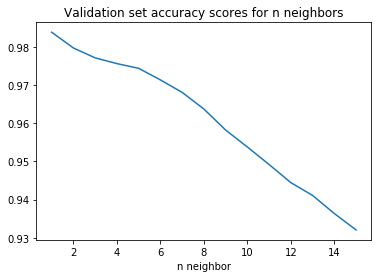


Best k value : 1

Accuracy score for test set :0.9855260061190868


In [41]:
## After having got the best number of folds for cross-validation as shown above, perform cross validation with KFold 
## and cross_val_score functions for X_train and y_train to find performance of the model for the best number of nearest neighbor.
## With that neaerest neighbor,  model is tested on X_test data. 

scores = {}
fold = StratifiedKFold(n_splits = 10, random_state = 0 , shuffle = True)

for n in range(1,16):
    knn = KNeighborsClassifier(n_neighbors = n)
    
    %time scores[n] = np.mean(cross_val_score(knn, X_train , y_train, scoring = 'accuracy', cv = fold))

k_best = max(scores, key = scores.get)

plt.plot(range(1,16),scores.values()) 
plt.title("Validation set accuracy scores for n neighbors")
plt.xlabel("n neighbor")
plt.show()

print("\nBest k value : {}" .format(k_best))

## Check test data performance.
knn = KNeighborsClassifier(n_neighbors = k_best)
knn.fit(X_train,y_train)

print("\nAccuracy score for test set :{}".format(knn.score(X_test,y_test)))


Wall time: 8.28 s
Wall time: 10.5 s
Wall time: 11.6 s
Wall time: 12.2 s
Wall time: 13 s
Wall time: 14.5 s
Wall time: 15.8 s
Wall time: 17.5 s
Wall time: 19.3 s
Wall time: 20.4 s


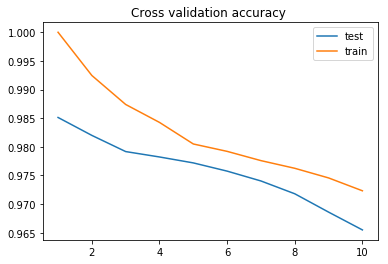

In [42]:
## Checking for accuracy with 10 fold, cross validation with StratifiedKFold splitting.This is to check the training set score so as
## check for model regularization.

test_scores = {}
train_scores = {}
## Using KFold for data splitting 
fold = StratifiedKFold(n_splits = 10, random_state = 0, shuffle = True)
for n in range(1,11):
    
    knn = KNeighborsClassifier(n_neighbors = n)

    %time scores = cross_validate(knn, predictors , target, scoring = 'accuracy', cv =fold, return_train_score = True)
    test_scores[n] = np.mean(scores['test_score'])
    train_scores[n] = np.mean(scores['train_score'])

plt.plot(range(1,11),test_scores.values(), label = 'test')  
plt.plot(range(1,11), train_scores.values(), label = 'train')
plt.title("Cross validation accuracy ")
plt.legend()
plt.show()



StratifiedKFold with shuffle gives a maximum test set score of 98.5% for 1 nearest neighbor. The accuracy decreases as nearest-neighbor increases.

In [43]:
## Other Classification metrics for KNeighborClassifer :
## Check the classification_report on Precision , Recall and F1 score for each class on test data 
## Also look into the confusion matrix for the individual classification details 

knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train,y_train)

%time y_pred = knn.predict(X_test)
print("Accuracy score :{:.3f}".format(accuracy_score(y_test,y_pred)))

print("Confusion matrix :\n{}".format(confusion_matrix(y_test,y_pred)))
print("Classification report :\n{}".format(classification_report(y_test,y_pred)))



Wall time: 295 ms
Accuracy score :0.986
Confusion matrix :
[[1462    0    0    0    0    0]
 [   2 1332    7    5    6    9]
 [   1    2 1445    1    3   14]
 [   0    2    1 1346   13    3]
 [   2    2    3   14 1391    3]
 [   1    7   13    6    3 1399]]
Classification report :
             precision    recall  f1-score   support

          1       1.00      1.00      1.00      1462
          2       0.99      0.98      0.98      1361
          3       0.98      0.99      0.98      1466
          4       0.98      0.99      0.98      1365
          5       0.98      0.98      0.98      1415
          6       0.98      0.98      0.98      1429

avg / total       0.99      0.99      0.99      8498



Its observed that KNeighborsClassificier test set accuracy is 0.98 and Recall is the highest for label'1' followed by '3' and '4'. 

In [44]:
## Check the performance of KNeighborClassification with scaled data 
scaler = MinMaxScaler()
features_xformed = scaler.fit_transform(predictors)
print(" max value: {}".format(features_xformed.max()))
print("min value :{}".format(features_xformed.min()))

## with 'cross_val_score' and 'cross_val_predict' check the performance of KNeighborClassifier 

fold = StratifiedKFold(n_splits = 10, random_state = 0, shuffle = True)
knn = KNeighborsClassifier(n_neighbors = 1)
print("\nCross validation score:{}".format(cross_val_score(knn, features_xformed, target , cv = fold)))
y_pred = cross_val_predict(knn,features_xformed, target , cv = fold)
print("Accuracy score :{:.3f}".format(accuracy_score(target,y_pred)))

print("Confusion matrix :\n{}".format(confusion_matrix(target,y_pred)))
print("Classification report :\n{}".format(classification_report(target,y_pred)))



 max value: 1.0000000000000002
min value :0.0

Cross validation score:[ 0.99035748  0.98517996  0.98494472  0.98964706  0.98140739  0.98493409
  0.98540146  0.98328232  0.98681422  0.98304286]
Accuracy score :0.986
Confusion matrix :
[[7309    0    0    0    2    0]
 [   4 6670   31   19   34   48]
 [   3   13 7228   12   16   57]
 [   5    5    9 6724   73    8]
 [  10   18   12   79 6942   14]
 [   7   27   78   19   13 6999]]
Classification report :
             precision    recall  f1-score   support

          1       1.00      1.00      1.00      7311
          2       0.99      0.98      0.99      6806
          3       0.98      0.99      0.98      7329
          4       0.98      0.99      0.98      6824
          5       0.98      0.98      0.98      7075
          6       0.98      0.98      0.98      7143

avg / total       0.99      0.99      0.99     42488



Its observed that for KNeighborClassifier the scaling of data has produced the same result as non-scaled data. This is because the values in the features - Chanel1 - Chanel8 aren't varying much .This can be checked by calculating variance . 

In [45]:
print("Maximum Variance among the feaures :{}".format(np.max(predictors.var(axis =1))))

Maximum Variance among the feaures :3.555982142857142e-07


    Logistic Regression :

In [46]:
## perform multivariate logistic regression 


lg = LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs')
lg.fit(X_train,y_train)
%time train_pred = lg.predict(X_train)
print("Train Score : " + str(lg.score(X_train,y_train)))
accuracy = np.mean(y_train == train_pred)
print("Train Accuracy using predicted labels :" + str(accuracy))

test_pred = lg.predict(X_test)
#accuracy = np.sum(y_test == test_pred)/y_test.shape[0]
#print("Test Accuracy :" + str(accuracy))

print("Test set score using predicted labels: {:.2f}".format(np.mean(test_pred == y_test)))

print("Calculated Test set score: {:.2f}".format(lg.score(X_test,y_test)))

print("Accuracy score :{:.3f}".format(accuracy_score(y_test,test_pred)))

print("Confusion matrix :\n{}".format(confusion_matrix(y_test,test_pred)))


Wall time: 8.98 ms
Train Score : 0.172491909385
Train Accuracy using predicted labels :0.172491909385
Test set score using predicted labels: 0.17
Calculated Test set score: 0.17
Accuracy score :0.173
Confusion matrix :
[[   0    0 1462    0    0    0]
 [   0    0 1361    0    0    0]
 [   0    0 1466    0    0    0]
 [   0    0 1365    0    0    0]
 [   0    0 1415    0    0    0]
 [   0    0 1429    0    0    0]]


Logistic Regression performance on the EMG data is very poor with only 17% Test and Train Accuracy . 

    Decision Trees Classification : 

Train set accuracy :1.0
Test set accuracy :0.9849376323840904
Max depth of the tree :28


([0, 1, 2, 3, 4, 5, 6, 7], <a list of 8 Text xticklabel objects>)

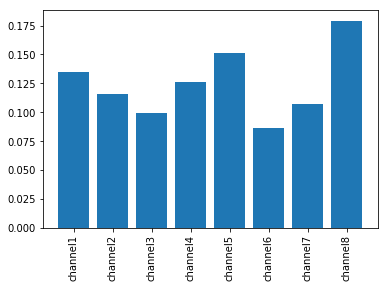

In [47]:
## Decision Tree Classifier  - unpruned data.  

dt = DecisionTreeClassifier(random_state = 0)
dt.fit(X_train,y_train)
print("Train set accuracy :{}".format(dt.score(X_train,y_train)))
print("Test set accuracy :{}".format(dt.score(X_test,y_test)))
print("Max depth of the tree :{}".format(dt.tree_.max_depth))
cols = X_train.columns.tolist()
plt.bar(cols, dt.feature_importances_)
plt.xticks(rotation = 90)



DecisionTreeClassifier builds an unpruned tree of depth = 28 . It overfits the training data .Next, is to prune the tree for different values of depth .

X_train shape:(28891, 8)
y_train shape:(28891,)
X_validate shape:(7223, 8)
y_validate shape:(7223,)
X_test shape:(6374, 8)
y_test shape:(6374,)


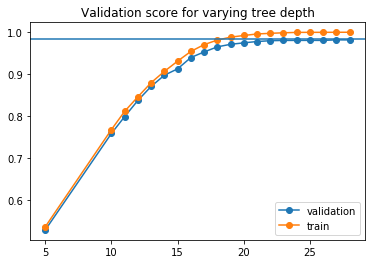

In [48]:
## Decision Tree Classifier  - with pruning and train->validate ->test

depth = [5,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28]

## split data into train-validate-test sets.

X_trainval,X_test,y_trainval,y_test = train_test_split(predictors, target, random_state = 1,test_size = 0.15,stratify = target)
X_train,X_validate,y_train,y_validate = train_test_split(X_trainval, y_trainval, random_state = 1,test_size = 0.2,stratify = y_trainval)

print("X_train shape:{}".format(X_train.shape))
print("y_train shape:{}".format(y_train.shape))
print("X_validate shape:{}".format(X_validate.shape))
print("y_validate shape:{}".format(y_validate.shape))
print("X_test shape:{}".format(X_test.shape))
print("y_test shape:{}".format(y_test.shape))

train_scores = {}
validation_scores = {}

for d in depth:
    dt = DecisionTreeClassifier(random_state = 0, max_depth = d)
    dt.fit(X_train,y_train)
    train_scores[d] = dt.score(X_train,y_train)
    validation_scores[d] = dt.score(X_validate,y_validate)

plt.plot(depth, validation_scores.values(), 'o-' ,label = 'validation')
plt.plot(depth , train_scores.values() ,'o-', label = 'train')
plt.axhline(y = 0.985)
plt.title("Validation score for varying tree depth")
plt.legend()
plt.show()

Tree pruning: Its seen that the model starts overfitting from the depth = 15 . 

Train set accuracy :0.9704406216468796
Test set accuracy :0.9541888923752746


([0, 1, 2, 3, 4, 5, 6, 7], <a list of 8 Text xticklabel objects>)

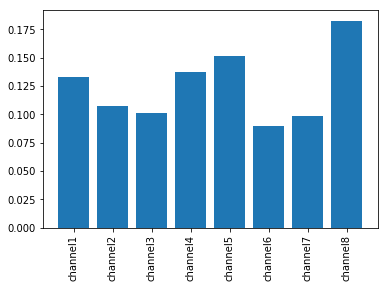

In [49]:
## Selecting max_depth = 17 , check the performance of the model on test data and look into the model attributes

dt = DecisionTreeClassifier(random_state = 0, max_depth = 17)
dt.fit(X_train,y_train)
print("Train set accuracy :{}".format(dt.score(X_train,y_train)))
print("Test set accuracy :{}".format(dt.score(X_test,y_test)))

cols = X_train.columns.tolist()
plt.bar(cols, dt.feature_importances_)
plt.xticks(rotation = 90)

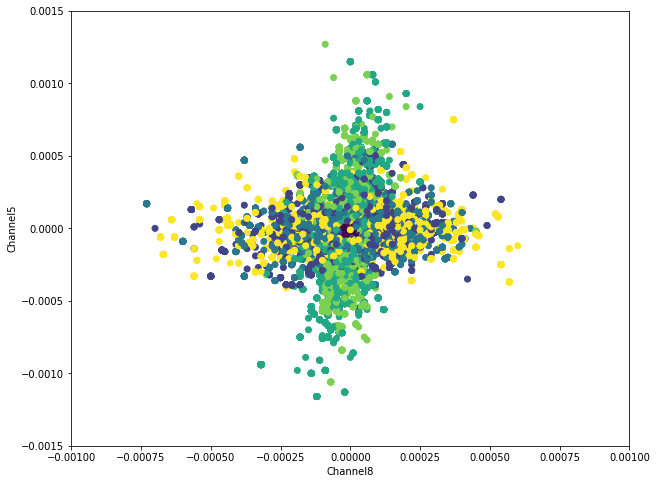

In [50]:
##  Visualize Channel 8 and channel5 values based on the feature importance as shown above
plt.figure(figsize = (10,8))
plt.scatter(X_train['channel8'],X_train['channel5'],c= y_train)
plt.xlim(-0.0010,0.0010)
plt.ylim(-0.0015,0.0015)
plt.ylabel('Channel5')
plt.xlabel('Channel8')
plt.show()

Wall time: 627 ms
Wall time: 799 ms
Wall time: 982 ms
Wall time: 1.23 s
Wall time: 1.39 s
Wall time: 1.56 s
Wall time: 1.78 s


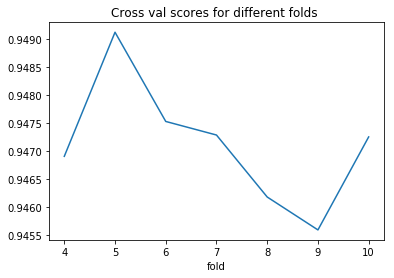

best accuracy obtained with fold:5


In [51]:
## Cross Validation - Performance of Decision Tree Classifier on n fold cross -validation.Vary fold from 4 to 10 .
## The tree depth is selected from the previous graph .

X_train,X_test,y_train,y_test = train_test_split(X_trainval, y_trainval, random_state = 1,test_size = 0.2,stratify = y_trainval)

dt = DecisionTreeClassifier(random_state = 0, max_depth = 17)
scores ={}
n_folds = list(range(4,11))
for f in n_folds:
    fold = StratifiedKFold(n_splits = f, random_state = 0, shuffle = True)
    %time scores[f] = np.mean(cross_val_score(dt, X_train, y_train, cv = fold))

plt.plot(n_folds, scores.values())
plt.title("Cross val scores for different folds ")
plt.xlabel("fold")
plt.show()
f_best = max(scores, key = scores.get)
print("best accuracy obtained with fold:{}".format(f_best))


In [53]:
## Checking the performance of DecisionTreeClassifier on test data  .
X_train,X_test,y_train,y_test = train_test_split(X_trainval, y_trainval, random_state = 1,test_size = 0.2,stratify = y_trainval)

fold = StratifiedKFold(n_splits = 5, random_state = 0, shuffle = True)
dt = DecisionTreeClassifier(random_state = 0, max_depth = 17)

test_accuracy = np.mean(cross_val_score(dt, X_test, y_test, cv = fold))

print("Cross validation Test set Accuracy :{:.3f}".format(test_accuracy))


Cross validation Test set Accuracy :0.909


In [9]:
## Checking the performance of DecisionTreeClassifier on test data  .

X_train,X_test,y_train,y_test = train_test_split(predictors, target, random_state = 1,test_size = 0.2,stratify = target)

dt = DecisionTreeClassifier(random_state = 0, max_depth = 17)
dt.fit(X_train,y_train)
%time y_pred = dt.predict(X_test)

print("Test set Accuracy score :{:.3f}".format(accuracy_score(y_test,y_pred)))

print("Confusion matrix :\n{}".format(confusion_matrix(y_test,y_pred)))
print("\nClassification report :\n{}".format(classification_report(y_test,y_pred)))

Wall time: 5.98 ms
Test set Accuracy score :0.953
Confusion matrix :
[[1450    0    9    3    0    0]
 [   0 1299   18   11    5   28]
 [   0    7 1389   16    5   49]
 [   0    3   13 1312   31    6]
 [   1    7   28   44 1331    4]
 [   0    7   80   19    3 1320]]

Classification report :
             precision    recall  f1-score   support

          1       1.00      0.99      1.00      1462
          2       0.98      0.95      0.97      1361
          3       0.90      0.95      0.93      1466
          4       0.93      0.96      0.95      1365
          5       0.97      0.94      0.95      1415
          6       0.94      0.92      0.93      1429

avg / total       0.95      0.95      0.95      8498



As compared to KNeighborClassifier , a pruned DecisionTreeClassifier of  max_depth = 17 has lesser test set accuracy of 0.95 and  lesser values for precision ,recall and f1-score for all the labels. Recall value is the best for label 1 , followed by label 4 and 2,3 . 
Features with higher predictive power is Channel8,Channel5 and then Channel4.
Time taken for its execution is lesser than KNeighborClassification(2.99 ms Vs 173ms)

    Random Forest Classifier :

X_train :(33990, 8)
X_test :(8498, 8)
y_train :(33990,)
y_test :(8498,)

Train set accuracy :0.9996469549867608
Test set accuracy :0.9855260061190868


([0, 1, 2, 3, 4, 5, 6, 7], <a list of 8 Text xticklabel objects>)

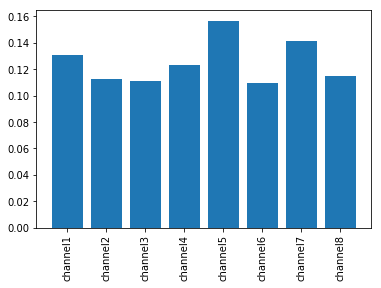

In [59]:
## RandomForestClassifier .- unpruned . 

X_train,X_test,y_train,y_test = train_test_split(predictors, target, random_state = 1,test_size = 0.2,stratify = target)

print("X_train :" + str(X_train.shape))
print("X_test :" + str(X_test.shape))
print("y_train :" + str(y_train.shape))
print("y_test :" + str(y_test.shape))

rf = RandomForestClassifier(random_state = 1)
rf.fit(X_train,y_train)

print("\nTrain set accuracy :{}".format(rf.score(X_train,y_train)))
print("Test set accuracy :{}".format(rf.score(X_test,y_test)))

#print("Max depth of the tree :{}".format(rf.tree_.max_depth))
cols = X_train.columns.tolist()
plt.bar(cols, rf.feature_importances_)
plt.xticks(rotation = 90)



RandomForest with 10 trees and with out pruning  gives a test set accuracy of 98% . 
Channel1 and Channel5 feature are  important as compared to Decision Trees


X_train shape:(28891, 8)
y_train shape:(28891,)
X_validate shape:(7223, 8)
y_validate shape:(7223,)
X_test shape:(6374, 8)
y_test shape:(6374,)


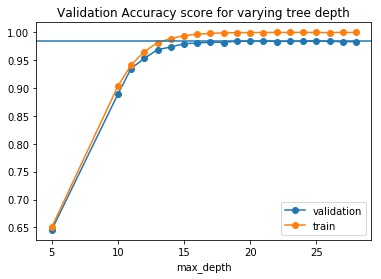


Highest validation accuracy : 0.9844939775716461

Depth at highest validation accuracy : 21


In [70]:
## Using train-validation data to select the parameters of the model- max_depth. There after , testing accuracy with test data.

depth = [5,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28]

## split data into train-validate-test sets.

X_trainval,X_test,y_trainval,y_test = train_test_split(predictors, target, random_state = 1,test_size = 0.15,stratify = target)
X_train,X_validate,y_train,y_validate = train_test_split(X_trainval, y_trainval, random_state = 1,test_size = 0.2,stratify = y_trainval)

print("X_train shape:{}".format(X_train.shape))
print("y_train shape:{}".format(y_train.shape))
print("X_validate shape:{}".format(X_validate.shape))
print("y_validate shape:{}".format(y_validate.shape))
print("X_test shape:{}".format(X_test.shape))
print("y_test shape:{}".format(y_test.shape))

train_scores = {}
validation_scores = {}
for d in depth:
    rf = RandomForestClassifier(random_state = 0, max_depth = d)
    rf.fit(X_train,y_train)
    train_scores[d] = rf.score(X_train,y_train)
    validation_scores[d] = rf.score(X_validate,y_validate)

plt.plot(depth, validation_scores.values(), 'o-' ,label = 'validation')
plt.plot(depth , train_scores.values() ,'o-', label = 'train')
plt.axhline(y = 0.985)
plt.title("Validation Accuracy score for varying tree depth")
plt.xlabel("max_depth")
plt.legend()
plt.show()

print("\nHighest validation accuracy : {}".format( max(validation_scores.values()) ))
print("\nDepth at highest validation accuracy : {}".format(max(validation_scores, key = validation_scores.get)))


RandomForestClassifier gives a higher accuracy score for lesser depth of trees. Select max_depth = 13 and check the performance.

Train set accuracy :0.981343671039424
Test set accuracy :0.969720740508315


([0, 1, 2, 3, 4, 5, 6, 7], <a list of 8 Text xticklabel objects>)

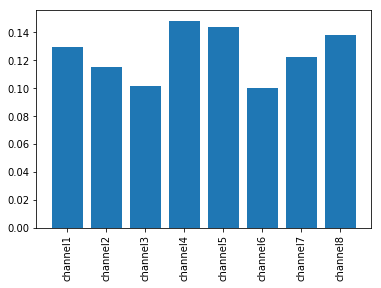

In [71]:
## Selecting max_depth = 13 , check the performance of the model on test data and look into the model attributes

rf = RandomForestClassifier(random_state = 0, max_depth = 13)
rf.fit(X_train,y_train)
print("Train set accuracy :{}".format(rf.score(X_train,y_train)))
print("Test set accuracy :{}".format(rf.score(X_test,y_test)))

cols = X_train.columns.tolist()
plt.bar(cols, rf.feature_importances_)
plt.xticks(rotation = 90)

X_train shape:(28891, 8)
y_train shape:(28891,)
X_validate shape:(7223, 8)
y_validate shape:(7223,)
X_test shape:(6374, 8)
y_test shape:(6374,)

Best score: 0.9786792191610134

 No of Trees for best score:310


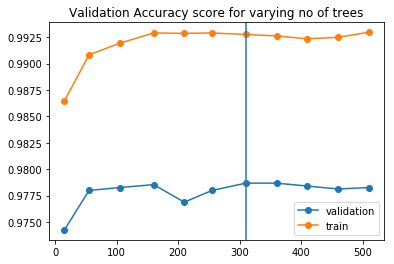

In [72]:
## Varying the number of trees with max_depth = 13
estimators = [15,55,105,160,210,255,310,360,410,460,510]

## split data into train-validate-test sets.

X_trainval,X_test,y_trainval,y_test = train_test_split(predictors, target, random_state = 1,test_size = 0.15,stratify = target)
X_train,X_validate,y_train,y_validate = train_test_split(X_trainval, y_trainval, random_state = 1,test_size = 0.2,stratify = y_trainval)

print("X_train shape:{}".format(X_train.shape))
print("y_train shape:{}".format(y_train.shape))
print("X_validate shape:{}".format(X_validate.shape))
print("y_validate shape:{}".format(y_validate.shape))
print("X_test shape:{}".format(X_test.shape))
print("y_test shape:{}".format(y_test.shape))

train_scores = {}
validation_scores = {}
for n in estimators:
    rf = RandomForestClassifier(n_estimators = n, random_state = 0, max_depth = 13)
    rf.fit(X_train,y_train)
    train_scores[n] = rf.score(X_train,y_train)
    validation_scores[n] = rf.score(X_validate,y_validate)

best_trees = max(validation_scores, key = validation_scores.get)
print("\nBest score: {}".format(max(validation_scores.values())))
print("\nNo of Trees for best score:{}".format(best_trees))
plt.plot(estimators, validation_scores.values(), 'o-' ,label = 'validation')
plt.plot(estimators , train_scores.values() ,'o-', label = 'train')
plt.axvline(x = best_trees)
plt.title("Validation Accuracy score for varying no of trees")
plt.legend()
plt.show()

Train set accuracy :0.9927659132601848
Wall time: 3.21 s
Test set accuracy :0.9813304047693756


([0, 1, 2, 3, 4, 5, 6, 7], <a list of 8 Text xticklabel objects>)

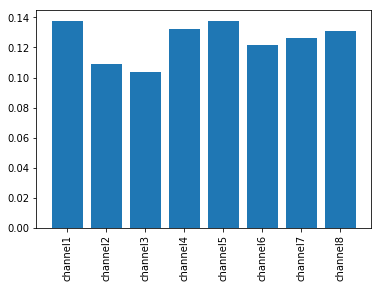

In [73]:
## Selecting max_depth = 13 , check the performance of the model on test data and look into the model attributes

rf = RandomForestClassifier(random_state = 0, max_depth = 13, n_estimators = best_trees)
rf.fit(X_train,y_train)
%time print("Train set accuracy :{}".format(rf.score(X_train,y_train)))
print("Test set accuracy :{}".format(rf.score(X_test,y_test)))

cols = X_train.columns.tolist()
plt.bar(cols, rf.feature_importances_)
plt.xticks(rotation = 90)

In [74]:
## Selecting max_depth = 13 , check the performance of the model on test data and look into confusion matrix and classification report
rf = RandomForestClassifier(random_state = 0, max_depth = 13, n_estimators = best_trees)
rf.fit(X_train,y_train)
%time y_pred = rf.predict(X_test)

print("Model Accuracy score :{:.3f}".format(accuracy_score(y_test,y_pred)))

print("Confusion matrix :\n{}".format(confusion_matrix(y_test,y_pred)))
print("\nClassification report :\n{}".format(classification_report(y_test,y_pred)))

Wall time: 683 ms
Accuracy score :0.981
Confusion matrix :
[[1097    0    0    0    0    0]
 [   0  995    4    1    8   13]
 [   6    1 1072    4    2   14]
 [   0    1    1 1011   11    0]
 [   0    1    2   22 1034    2]
 [   0    2   14    7    3 1046]]

Classification report :
             precision    recall  f1-score   support

          1       0.99      1.00      1.00      1097
          2       0.99      0.97      0.98      1021
          3       0.98      0.98      0.98      1099
          4       0.97      0.99      0.98      1024
          5       0.98      0.97      0.98      1061
          6       0.97      0.98      0.97      1072

avg / total       0.98      0.98      0.98      6374



RandomForestClassifier with 310 trees , each with max_depth of 13 performs better than DecisionTreeClassifier in the Recall metrics as recall of label 1 is highest , followed by label 4 and 3 and 6 . The test set accuracy is also better than the DecisionTrees Regression. Features that show predictive importance are different than  DecisionTreeClassifier - Channel1, Channel5 and then Channel4. Time for execution is more than KneighborClassifier - (664 ms Vs 176ms)

In [13]:
## Looking into cross validation with Random Forest Classifier 

fold = StratifiedKFold(n_splits = 5, random_state = 0, shuffle = True)
rf = RandomForestClassifier(random_state = 0, max_depth = 13, n_estimators = 310)

rf_cv_accuracy = np.mean(cross_val_score(rf,predictors , target, cv = fold))

print("RFC Cross validation Accuracy wtih 5 folds  :{:.3f}".format(rf_cv_accuracy))

RFC Cross validation Accuracy wtih 5 folds  :0.982


    Gradient Boosting Classifier :

Train set accuracy :0.8437187408061194
Test set accuracy :0.8363144269239822


([0, 1, 2, 3, 4, 5, 6, 7], <a list of 8 Text xticklabel objects>)

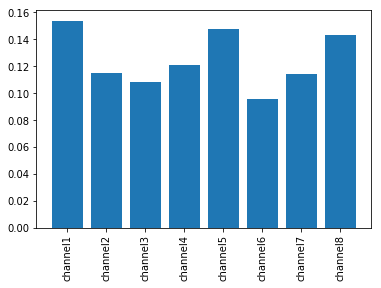

In [75]:
##GradientBoostingClassifier

##split data into train and test 
X_train,X_test,y_train,y_test = train_test_split(predictors, target, random_state = 1,test_size = 0.20,stratify = target)

gb = GradientBoostingClassifier(random_state = 1, )
gb.fit(X_train,y_train)

print("Train set accuracy :{}".format(gb.score(X_train,y_train)))
print("Test set accuracy :{}".format(gb.score(X_test,y_test)))

cols = X_train.columns.tolist()
plt.bar(cols, gb.feature_importances_)
plt.xticks(rotation = 90)




X_train shape:(28891, 8)
y_train shape:(28891,)
X_validate shape:(7223, 8)
y_validate shape:(7223,)
X_test shape:(6374, 8)
y_test shape:(6374,)

Best score: 0.9684341686279939

No of Trees for best score:510


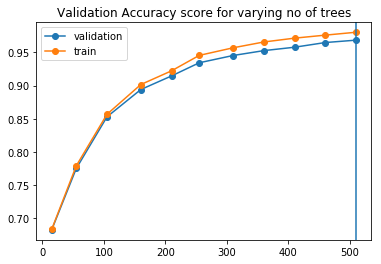

In [77]:
## Vary the number of trees and check for validation accuracy .

estimators = [15,55,105,160,210,255,310,360,410,460,510]

X_trainval,X_test,y_trainval,y_test = train_test_split(predictors, target, random_state = 1,test_size = 0.15,stratify = target)
X_train,X_validate,y_train,y_validate = train_test_split(X_trainval, y_trainval, random_state = 1,test_size = 0.2,stratify = y_trainval)

print("X_train shape:{}".format(X_train.shape))
print("y_train shape:{}".format(y_train.shape))
print("X_validate shape:{}".format(X_validate.shape))
print("y_validate shape:{}".format(y_validate.shape))
print("X_test shape:{}".format(X_test.shape))
print("y_test shape:{}".format(y_test.shape))

train_scores = {}
validation_scores = {}
for n in estimators:
    rf = GradientBoostingClassifier(n_estimators = n, random_state = 0)
    rf.fit(X_train,y_train)
    train_scores[n] = rf.score(X_train,y_train)
    validation_scores[n] = rf.score(X_validate,y_validate)

best_trees = max(validation_scores, key = validation_scores.get)
print("\nBest score: {}".format(max(validation_scores.values())))
print("\nNo of Trees for best score:{}".format(best_trees))
plt.plot(estimators, validation_scores.values(), 'o-' ,label = 'validation')
plt.plot(estimators , train_scores.values() ,'o-', label = 'train')
plt.axvline(x = best_trees)
plt.title("Validation Accuracy score for varying no of trees")
plt.legend()
plt.show()

X_train shape:(28891, 8)
y_train shape:(28891,)
X_validate shape:(7223, 8)
y_validate shape:(7223,)
X_test shape:(6374, 8)
y_test shape:(6374,)

 No of Trees for best score:900


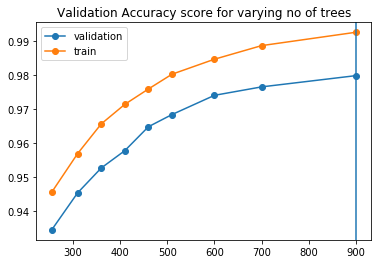

In [78]:
## Based on the above plot , check GBC performance with trees - 260 - 900

estimators = [255,310,360,410,460,510,600,700,900]

X_trainval,X_test,y_trainval,y_test = train_test_split(predictors, target, random_state = 1,test_size = 0.15,stratify = target)
X_train,X_validate,y_train,y_validate = train_test_split(X_trainval, y_trainval, random_state = 1,test_size = 0.2,stratify = y_trainval)

print("X_train shape:{}".format(X_train.shape))
print("y_train shape:{}".format(y_train.shape))
print("X_validate shape:{}".format(X_validate.shape))
print("y_validate shape:{}".format(y_validate.shape))
print("X_test shape:{}".format(X_test.shape))
print("y_test shape:{}".format(y_test.shape))

train_scores = {}
validation_scores = {}
for n in estimators:
    gb = GradientBoostingClassifier(n_estimators = n, random_state = 0)
    gb.fit(X_train,y_train)
    train_scores[n] = gb.score(X_train,y_train)
    validation_scores[n] = gb.score(X_validate,y_validate)

best_trees = max(validation_scores, key = validation_scores.get)
print("\n No of Trees for best score:{}".format(best_trees))
plt.plot(estimators, validation_scores.values(), 'o-' ,label = 'validation')
plt.plot(estimators , train_scores.values() ,'o-', label = 'train')
plt.axvline(x = best_trees)
plt.title("Validation Accuracy score for varying no of trees")
plt.legend()
plt.show()

Test set accuracy :0.9836837150925636


([0, 1, 2, 3, 4, 5, 6, 7], <a list of 8 Text xticklabel objects>)

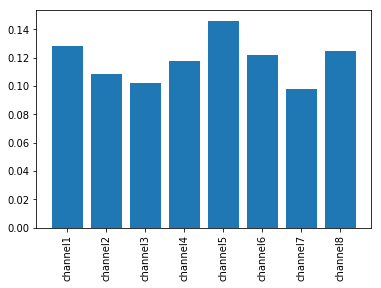

In [79]:
## Test the performance of GbC with 900 trees on test data .
gb = GradientBoostingClassifier(n_estimators = 900, random_state = 0)
gb.fit(X_train,y_train)
print("Test set accuracy :{}".format(gb.score(X_test,y_test)))

cols = X_train.columns.tolist()
plt.bar(cols, gb.feature_importances_)
plt.xticks(rotation = 90)


Highest score: 0.9799252388204347

 Learning rate for best score:0.1


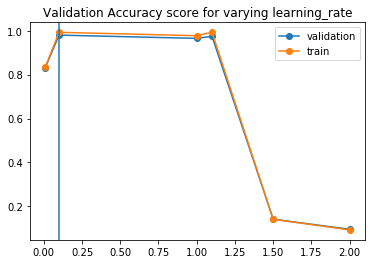

In [80]:
## Selecting n_estimators as 900 , vary the learning_rate to understand the performance of GBC on train-validation data .

learning_rate = [0.01,0.1,1,1.1,1.5,2]

train_scores = {}
validation_scores = {}
for l in learning_rate:
    gb = GradientBoostingClassifier(n_estimators = 900, random_state = 0, learning_rate = l)
    gb.fit(X_train,y_train)
    train_scores[l] = gb.score(X_train,y_train)
    validation_scores[l] = gb.score(X_validate,y_validate)

best_rate = max(validation_scores, key = validation_scores.get)
print("\nHighest score: {}".format(max(validation_scores.values())))
print("\n Learning rate for best score:{}".format(best_rate))
plt.plot(learning_rate, validation_scores.values(), 'o-' ,label = 'validation')
plt.plot(learning_rate , train_scores.values() ,'o-', label = 'train')
plt.axvline(x = best_rate)
plt.title("Validation Accuracy score for varying learning_rate")
plt.legend()
plt.show()

Wall time: 1.09 s
Test set accuracy :0.985172981878089


([0, 1, 2, 3, 4, 5, 6, 7], <a list of 8 Text xticklabel objects>)

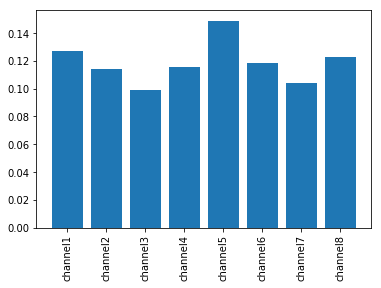

In [81]:
## Test the performance of GbC with the selected parameters  on test data .

X_train,X_test,y_train,y_test = train_test_split(predictors, target, random_state = 1,test_size = 0.2,stratify = target)

gb = GradientBoostingClassifier(n_estimators = 900, random_state = 0, learning_rate = 0.1)
gb.fit(X_train,y_train)
%time test_score = gb.score(X_test,y_test)
print("Test set accuracy :{}".format(test_score))

cols = X_train.columns.tolist()
plt.bar(cols, gb.feature_importances_)
plt.xticks(rotation = 90)

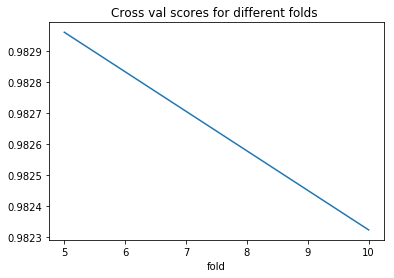

best accuracy obtained with fold:5


In [82]:
## Check the cross validation results for the above parameters . 


gb = GradientBoostingClassifier(n_estimators = 900, random_state = 0, learning_rate = 0.1)
scores ={}
n_folds = [5,10]
for f in n_folds:
    fold = StratifiedKFold(n_splits = f, random_state = 0, shuffle = True)
    scores[f] = np.mean(cross_val_score(gb, predictors, target, cv = fold))

plt.plot(n_folds, scores.values())
plt.title("Cross val scores for different folds ")
plt.xlabel("fold")
plt.show()
f_best = max(scores, key = scores.get)
print("best accuracy obtained with fold:{}".format(f_best))

In [105]:
## Looking into the confusion matrix and classification report on test data.

X_train,X_test,y_train,y_test = train_test_split(predictors, target, random_state = 1,test_size = 0.2,stratify = target)

gb = GradientBoostingClassifier(n_estimators = 500, random_state = 0, learning_rate = 1.1)
gb.fit(X_train,y_train)
%time y_pred = gb.predict(X_test)

print("Accuracy score :{:.3f}".format(accuracy_score(y_test,y_pred)))

print("Confusion matrix :\n{}".format(confusion_matrix(y_test,y_pred)))
print("\nClassification report :\n{}".format(classification_report(y_test,y_pred)))

Wall time: 521 ms
Accuracy score :0.987
Confusion matrix :
[[1462    0    0    0    0    0]
 [   0 1342    1    1    4   13]
 [   0    3 1444    2    2   15]
 [   0    3    0 1350    9    3]
 [   0    3    2   18 1391    1]
 [   0    6   15    5    3 1400]]

Classification report :
             precision    recall  f1-score   support

          1       1.00      1.00      1.00      1462
          2       0.99      0.99      0.99      1361
          3       0.99      0.98      0.99      1466
          4       0.98      0.99      0.99      1365
          5       0.99      0.98      0.99      1415
          6       0.98      0.98      0.98      1429

avg / total       0.99      0.99      0.99      8498



GradientBoostingClassifier has provided te best f1-score and recall among decisiontrees and randomforestclassifier. The performance is comparable to KNeighborClassifier . The time taken for execution is 5 times that of KNeighborClassifier.

    Neural Net Classifier :

In [46]:
X_train,X_test,y_train,y_test = train_test_split(predictors, target, random_state = 1,test_size = 0.2,stratify = target)

for n in [28,64,128,256]:
    
    nn = MLPClassifier(max_iter = 1000, activation = 'logistic' , random_state = 1, hidden_layer_sizes = (n,n,n), solver = 'sgd', alpha = 0.0001, learning_rate_init = 0.1 )
    nn.fit(X_train,y_train)
    y_pred = nn.predict(X_test)

    train_score = nn.score(X_train,y_train)
    test_score = nn.score(X_test,y_test)
    
    print("\nNo of neurons in 3 hidden layers :{}".format(n))
    print("Train set score: {}".format(train_score))
    print("Test set score: {}".format(test_score))
        


No of neurons in 3 hidden layers :28
Train set score: 0.16810826713739335
Test set score: 0.16815721346199106

No of neurons in 3 hidden layers :64
Train set score: 0.17249190938511327
Test set score: 0.17251117910096495

No of neurons in 3 hidden layers :128
Train set score: 0.1606060606060606
Test set score: 0.16062602965403625

No of neurons in 3 hidden layers :256
Train set score: 0.17249190938511327
Test set score: 0.17251117910096495


    Summary : 
    
1. KNeighbors Classifier :- Test set accuracy : 0.98 , Best Recall values for all the gesture labels , execution time - moderate
2. Decision Trees Classifier :- Test set accuracy - 0.95 , Lower Recall values for gesture other than 1 , least execution time 
3. Random Forest Classifier :- Test set accuracy - 0.98 , Better Recall values than Decision Trees , higher execution time 
4. Gradient Boosting Classifier :- Test set accuracy of 0.98 , Better Recall values among all the tree based menthods and higher execution time .
5. Logistic Regression and Neural Network Classifier have performed poorly with only 17% accuracy . Its yet to be researched why 
